In [1]:
import os
import re
import ROOT
import uproot
import numpy as np
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.28/07


### 2D Histograms

In [12]:
fname = os.path.expandvars("$HOME/Software/HK_Software/WCSimFQTuningTools/Angular/angular.root")

f = uproot.open(fname)
f.classnames()

{'AngularResponse_side;1': 'TH2D',
 'AngularResponse_top;1': 'TH2D',
 'AngularResponse_bottom;1': 'TH2D',
 'AngularResponse_all;1': 'TH2D'}

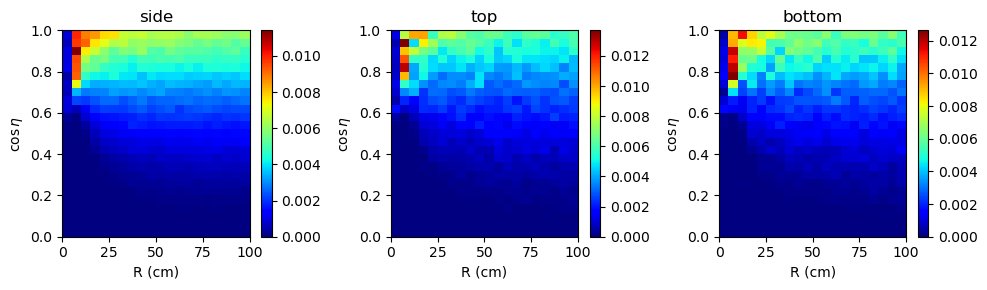

In [13]:
plt.figure(figsize=[10, 3])

# plot side
plt.subplot(131)
plt.title("side")
h, rbins, etabins = f["AngularResponse_side"].to_numpy()
plt.pcolormesh(rbins, etabins, h.T, cmap="jet")
plt.xlabel("R (cm)")
plt.ylabel(r"$\cos \eta$")
plt.colorbar()

# plot top
plt.subplot(132)
plt.title("top")
h, rbins, etabins = f["AngularResponse_top"].to_numpy()
plt.pcolormesh(rbins, etabins, h.T, cmap="jet")
plt.xlabel("R (cm)")
plt.ylabel(r"$\cos \eta$")
plt.colorbar()

# plot bottom
plt.subplot(133)
plt.title("bottom")
h, rbins, etabins = f["AngularResponse_bottom"].to_numpy()
plt.pcolormesh(rbins, etabins, h.T, cmap="jet")
plt.xlabel("R (cm)")
plt.ylabel(r"$\cos \eta$")
plt.colorbar()

plt.tight_layout()

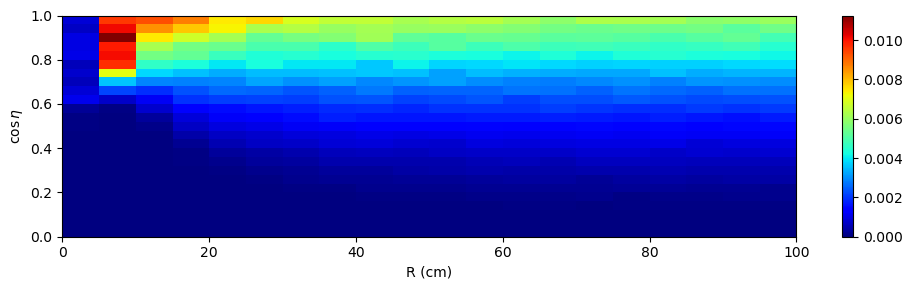

In [14]:
plt.figure(figsize=[10, 3])

h, rbins, etabins = f["AngularResponse_all"].to_numpy()
plt.pcolormesh(rbins, etabins, h.T, cmap="jet")
plt.xlabel("R (cm)")
plt.ylabel(r"$\cos \eta$")
plt.colorbar()

plt.tight_layout()

### Fit

In [15]:
fname = os.path.expandvars("$HOME/Software/HK_Software/WCSimFQTuningTools/Angular/fitted_angular.root")

f_fits = ROOT.TFile(fname)
tf1 = f_fits.Get("angResp")

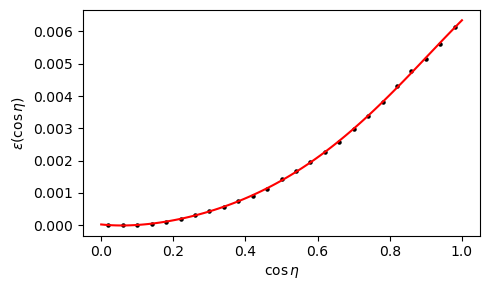

In [16]:
plt.figure(figsize=[5, 3])

h, rbins, etabins = f["AngularResponse_all"].to_numpy()

x = (etabins[1:] + etabins[:-1])/2.

a, b = 40, 100
idx_a = np.digitize(a, rbins)
idx_b = np.digitize(b, rbins)-1

plt.scatter(x, h[idx_a:idx_b].mean(axis=0), s=5, color="k")

x = np.linspace(0., 1., 100)
fitted = [tf1.Eval(eta) for eta in x]
plt.plot(x, fitted, color="r")

plt.xlabel(r"$\cos \eta$")
plt.ylabel(r"$\epsilon(\cos \eta)$")
plt.tight_layout()